# Decision Tree carbon, silicon, nitrogen, and aluminum isotopes

In [1]:
#Imports
import joblib
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Read the CSV file

In [2]:
# Read the csv and create a dataframe
C_Si_N_Al = pd.read_csv('presolargrains_C_Si_N_Al.csv')
C_Si_N_Al.head()

,Type,carbon_12_13,nitrogen_14_15,aluminum_26_27,silicon_29_28,silicon_30_28
0,X,1581.00,116.0,0.0095,-684.0,-490.0
1,X,234.75,187.2,0.3327,-683.0,-501.0
2,X,140.00,97.0,0.0170,-653.0,-446.0
3,X,223.00,102.0,0.1140,-600.0,-459.0
4,X,1693.89,63.2,0.2364,-588.0,-605.0


## Set up target

In [4]:
# Set up the target column and the target names
target = C_Si_N_Al["Type"]
target_names = ["AB", "C", "M", "N", "X", "Y", "Z"]

## Set up data and feature names

In [5]:
# Set up data and feature names; display dataframe after Type is dropped
data = C_Si_N_Al.drop("Type", axis=1)
feature_names = data.columns
data.head()

,carbon_12_13,nitrogen_14_15,aluminum_26_27,silicon_29_28,silicon_30_28
0,1581.00,116.0,0.0095,-684.0,-490.0
1,234.75,187.2,0.3327,-683.0,-501.0
2,140.00,97.0,0.0170,-653.0,-446.0
3,223.00,102.0,0.1140,-600.0,-459.0
4,1693.89,63.2,0.2364,-588.0,-605.0


## Create Train Test Split

In [6]:
# Separate data into train and test buckets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

## Scale the data using MinMaxScalar

In [7]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the model; Run the test score

In [8]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9390243902439024

## Graph the decision tree

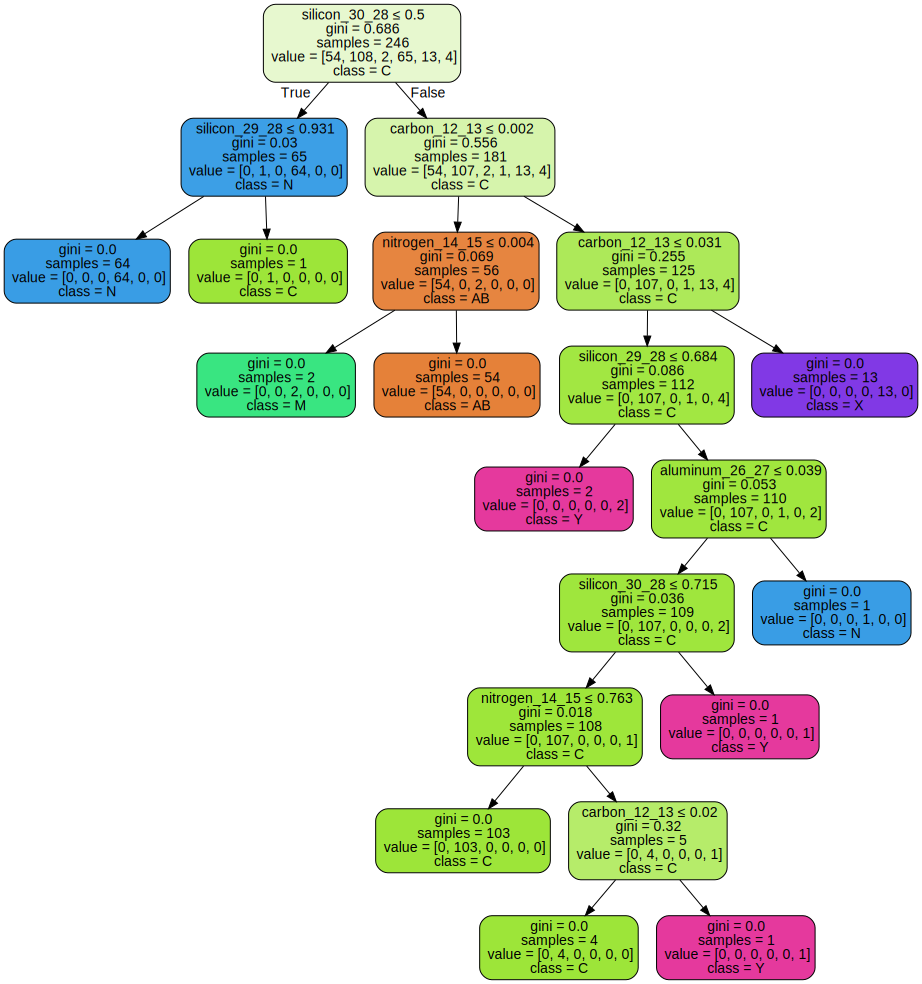

In [9]:
# Graph the Decision Tree (scroll down and to the right until the boxes appear below)
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('meteorite_C_Si_N_Al.png')

graph = graphviz.Source(dot_data)  
graph 

# See the Summary below the graphed tree.

## Save the model

In [10]:
# Save model to file
filename = 'DecisionTree_C_Si_N_Al.sav'
joblib.dump(clf, filename)

['DecisionTree_C_Si_N_Al.sav']

## Summary: 

### Decision Tree carbon, silicon, nitrogen, and aluminum: 93.9%